In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
440/443 [============================>.] - ETA: 0s - loss: 2.6748 - accuracy: 0.1714
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 4s 5ms/step - loss: 2.6718 - accuracy: 0.1724 - val_loss: 1.8083 - val_accuracy: 0.5363
Epoch 2/1000
437/443 [============================>.] - ETA: 0s - loss: 1.9013 - accuracy: 0.3592
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 2s 5ms/step - loss: 1.8994 - accuracy: 0.3602 - val_loss: 1.2641 - val_accuracy: 0.7284
Epoch 3/1000
442/443 [============================>.] - ETA: 0s - loss: 1.6754 - accuracy: 0.4319
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 2s 5ms/step - loss: 1.6755 - accuracy: 0.4318 - val_loss: 1.1048 - val_accuracy: 0.7444
Epoch 4/1000
434/443 [============================>.] - ETA: 0s - loss: 1.5793 - accu

Epoch 28/1000
424/443 [===========================>..] - ETA: 0s - loss: 1.1734 - accuracy: 0.6148
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 2s 4ms/step - loss: 1.1717 - accuracy: 0.6147 - val_loss: 0.6423 - val_accuracy: 0.8673
Epoch 29/1000
431/443 [============================>.] - ETA: 0s - loss: 1.1750 - accuracy: 0.6142
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 1s 3ms/step - loss: 1.1743 - accuracy: 0.6143 - val_loss: 0.6255 - val_accuracy: 0.8720
Epoch 30/1000
432/443 [============================>.] - ETA: 0s - loss: 1.1710 - accuracy: 0.6131
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 2s 3ms/step - loss: 1.1712 - accuracy: 0.6134 - val_loss: 0.6423 - val_accuracy: 0.8589
Epoch 31/1000
425/443 [===========================>..] - ETA: 0s - loss: 1.1659

Epoch 55/1000
440/443 [============================>.] - ETA: 0s - loss: 1.1156 - accuracy: 0.6405
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 1s 3ms/step - loss: 1.1147 - accuracy: 0.6408 - val_loss: 0.6460 - val_accuracy: 0.8431
Epoch 56/1000
441/443 [============================>.] - ETA: 0s - loss: 1.1073 - accuracy: 0.6407
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 2s 4ms/step - loss: 1.1070 - accuracy: 0.6407 - val_loss: 0.6440 - val_accuracy: 0.8486
Epoch 57/1000
440/443 [============================>.] - ETA: 0s - loss: 1.1180 - accuracy: 0.6397
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 2s 4ms/step - loss: 1.1176 - accuracy: 0.6398 - val_loss: 0.6386 - val_accuracy: 0.8440
Epoch 58/1000
426/443 [===========================>..] - ETA: 0s - loss: 1.1054

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

148/148 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.8049


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 130ms/step
[4.2607790e-06 2.0121895e-24 9.8831961e-06 2.5993757e-21 1.4613762e-12
 5.5087934e-05 9.4293687e-12 5.8422545e-20 1.4352733e-10 7.3604419e-08
 2.7083555e-26 1.4760216e-08 2.6970360e-01 7.3001105e-01 1.3995579e-08
 1.1598110e-13 2.8327483e-09 0.0000000e+00 4.9709193e-08 1.2676981e-05
 4.5621484e-37 4.9135182e-28 3.5560021e-29 4.4053133e-10 1.9518600e-04
 8.1213957e-06]
13


# Confusion matrix

591/591 [==============================] - 1s 1ms/step


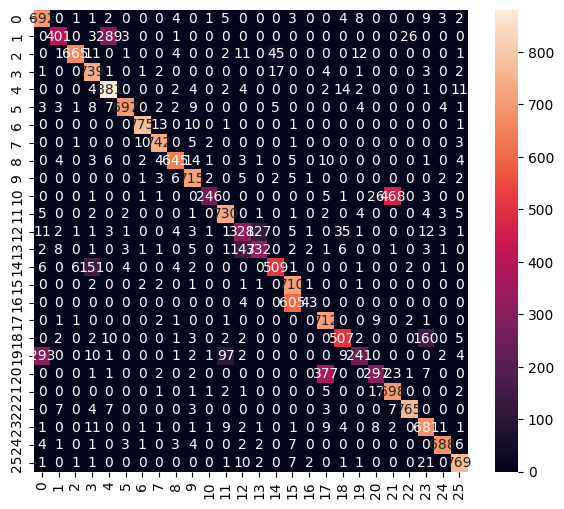

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       735
           1       0.93      0.55      0.70       723
           2       0.98      0.88      0.93       753
           3       0.77      0.96      0.86       771
           4       0.73      0.95      0.83       927
           5       0.98      0.93      0.95       746
           6       0.97      0.97      0.97       801
           7       0.96      0.97      0.96       764
           8       0.95      0.92      0.93       703
           9       0.91      0.96      0.94       744
          10       0.96      0.33      0.49       752
          11       0.85      0.96      0.90       760
          12       0.63      0.61      0.62       541
          13       0.71      0.64      0.67       517
          14       0.88      0.74      0.80       687
          15       0.52      0.98      0.68       721
          16       0.86      0.07      0.12       652
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpbeeqd8tw\assets


INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpbeeqd8tw\assets


7512

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.26079350e-06 2.01217492e-24 9.88319971e-06 2.59938660e-21
 1.46137692e-12 5.50879049e-05 9.42942599e-12 5.84227973e-20
 1.43527371e-10 7.36045891e-08 2.70836687e-26 1.47602250e-08
 2.69703239e-01 7.30011404e-01 1.39955585e-08 1.15981375e-13
 2.83274404e-09 0.00000000e+00 4.97092110e-08 1.26769974e-05
 4.56215024e-37 4.91353888e-28 3.55600395e-29 4.40531556e-10
 1.95186454e-04 8.12140024e-06]
13
